## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [1]:
name = 'Boris Evgenevich Belyakov'

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [2]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error

### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [3]:
#code here (1 pt.)
url = 'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'
df = pd.read_csv(url)

### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [4]:
# code here (0.5 pt.)
df.isna().value_counts()

sales  month  day    year 
False  False  False  False    147
dtype: int64

How many missing values are there in ``` df ```?

In [5]:
# answer (0.5 pt.)
0

0

In [6]:
# show rows with nan values
df[df.isna().any(axis=1)]

,sales,month,day,year


**No missing values in the provided dataframe.**

### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [7]:
# answer (0.5 pt.)

**The dates are formed by three columns, namely `year`, `month` and `day`, which represent respectively the year, the month and the day for the provided observation.**

Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [8]:
# code here (0.5 pt.)
df['date'] = df['year']*10000 + df['month']*100 + df['day']*1
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

Change index to dates:

``` df.index=.... ```

In [9]:
# code here (0.25 pt.)

# setting the index with the inplace method avoids unnecessary
# memory allocation for new structures inside pandas

# i would recommend to use
# df.set_index('date', inplace=True)
df.index = df['date']

What is the size of the dataset?

use ```.shape```

In [10]:
# code here (0.25 pt.)
df.shape

(147, 5)

Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [11]:
# code here (0.25 pt.)
# similarly for the `drop` method;
# i kept the `date` column in order to use it in 1.4
df.drop(columns=['day', 'month', 'year'], inplace=True)

What is the size of the dataset now?

In [12]:
# code here (0.25 pt.)
df.shape

(147, 2)

**Since we deleted the columns with the unparsed dates, only the target observations and the parsed date column remain in the dataframe.**

### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [13]:
# code here (0.25 pt.)
y = df['date']

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [14]:
# code here (0.25 pt.)
y = np.flip(y)

Plot the series using ```plot_series()```

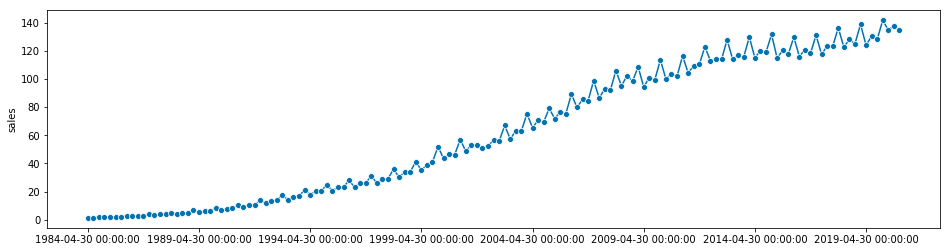

In [15]:
# code here (0.25 pt.)
# i use `sort_index` method as it is more demonstrative
# as we work with the original series, not only the dates column
df.sort_index(inplace=True)
plot_series(df.sales);

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [16]:
# code here (0.5 pt.)
train, test = temporal_train_test_split(df.sales, test_size=0.2)

plot train and test samples using ``` plot_series ```

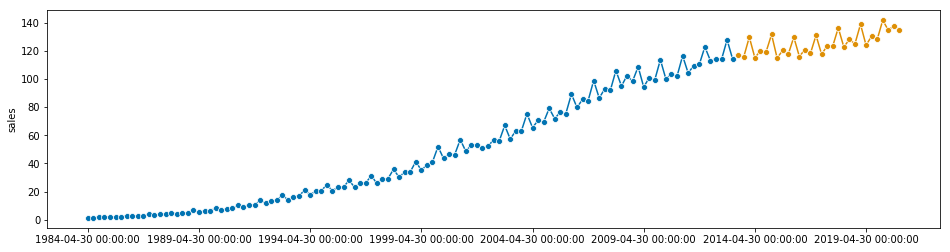

In [17]:
# code here (0.25 pt.)
plot_series(train, test);

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [18]:
# code here (0.5 pt.)
model_MAA = ETSModel(
    train,
    error='mul',
    trend='add',
    seasonal='add',
    seasonal_periods=4
)
fit_MAA = model_MAA.fit()

/Users/boris/.pyenv/versions/3.7.5/envs/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [19]:
# code here (0.5 pt.)
model_AAM = ETSModel(
    train,
    error='add',
    trend='add',
    seasonal='mul',
    seasonal_periods=4
)
fit_AAM = model_AAM.fit()

/Users/boris/.pyenv/versions/3.7.5/envs/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [20]:
# code here (0.25 pt.)
forecase_MAA = fit_MAA.forecast(steps=30)

Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [21]:
# code here (0.25 pt.)
forecase_AAM = fit_AAM.forecast(steps=30)

Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

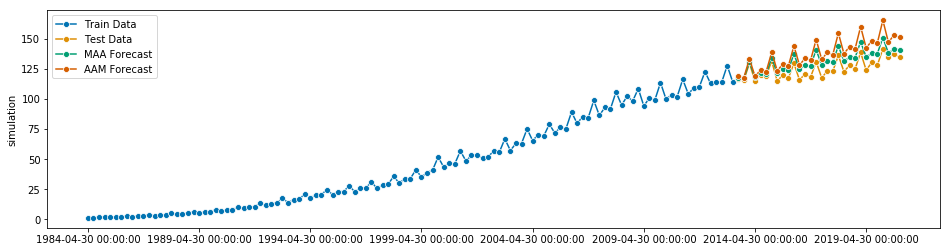

In [22]:
# code here (0.5 pt.)
lables = ['Train Data', 'Test Data', 'MAA Forecast', 'AAM Forecast']
plot_series(train, test, forecase_MAA, forecase_AAM, labels=lables);

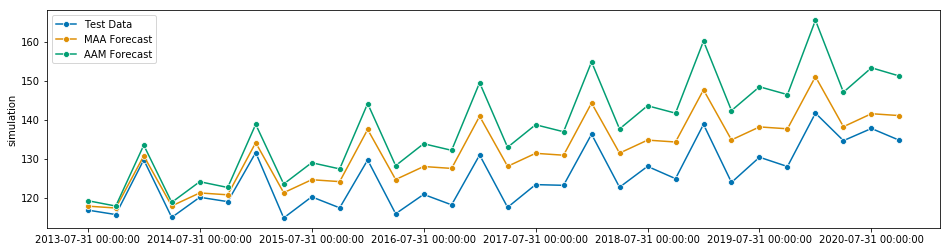

In [23]:
labels = ['Test Data', 'MAA Forecast', 'AAM Forecast']
plot_series(test, forecase_MAA, forecase_AAM, labels=labels);

### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [24]:
# code here (0.5 pt.)
pred_MAA = fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')
pred_MAA = pred_MAA.summary_frame(alpha=0.05)
lower_int, upper_int = pred_MAA['pi_lower'], pred_MAA['pi_upper']

Plot interval predictions:

```plot_series()```

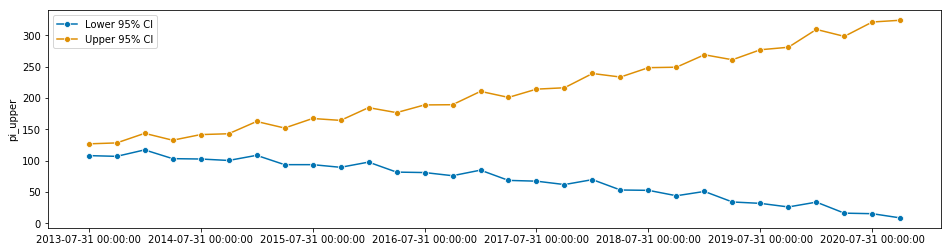

In [25]:
# code here (0.5 pt.)
labels = ['Lower 95% CI', 'Upper 95% CI']
plot_series(lower_int, upper_int, labels=labels);

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [26]:
# code here (0.5 pt.)
pred_AAM = fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')
pred_AAM = pred_AAM.summary_frame(alpha=0.05)
lower_int, upper_int = pred_AAM['pi_lower'], pred_AAM['pi_upper']

Plot interval predictions:

```plot_series()```

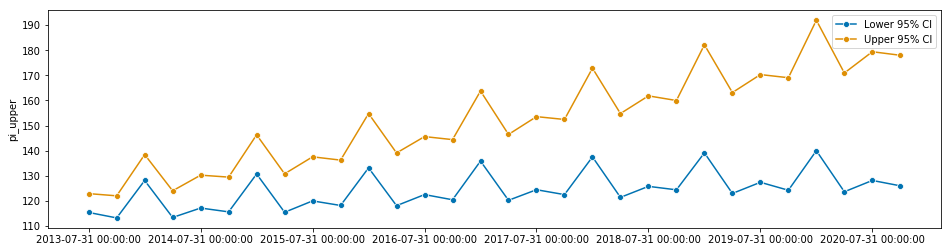

In [27]:
# code here (0.5 pt.)
labels = ['Lower 95% CI', 'Upper 95% CI']
plot_series(lower_int, upper_int, labels=labels);

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [28]:
# code here (0.5 pt.) MAA
y_true = test
y_pred = pred_MAA['mean']
mae_MAA = mean_absolute_error(y_true, y_pred)
mae_MAA

6.39454528807063

In [29]:
# code here (0.5 pt.) AAM
y_true = test
y_pred = pred_AAM['mean']
mae_AAM = mean_absolute_error(y_true, y_pred)
mae_AAM

12.709143484612452

$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [30]:
# code here (0.5 pt.) MAA
y_true = test
y_pred = pred_MAA['mean']
mse_MAA = mean_squared_error(y_true, y_pred)
mse_MAA

50.57145162625883

In [31]:
# code here (0.5 pt.) AAM
y_true = test
y_pred = pred_AAM['mean']
mse_AAM = mean_squared_error(y_true, y_pred)
mse_AAM

195.9695203584881

$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [32]:
# code here (0.5 pt.)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Calculate MAPE:

In [33]:
# code here (0.25 pt.) MAA
y_true = test
y_pred = pred_MAA['mean']
mape_MAA = mean_absolute_percentage_error(y_true, y_pred)
mape_MAA

5.0916999871520865

In [34]:
# code here (0.25 pt.) AAM
y_true = test
y_pred = pred_AAM['mean']
mape_AAM = mean_absolute_percentage_error(y_true, y_pred)
mape_AAM

9.993509359714576

### 2.6 What is the best model according to the metrics above? (1 pt.)

In [35]:
# code here (1 pt.)
summary = pd.DataFrame([
    {'metric': 'MAE', 'model': 'MAA', 'value': mae_MAA},
    {'metric': 'MAE', 'model': 'AAM', 'value': mae_AAM},
    {'metric': 'MSE', 'model': 'MAA', 'value': mse_MAA},
    {'metric': 'MSE', 'model': 'AAM', 'value': mse_AAM},
    {'metric': 'MAPE', 'model': 'MAA', 'value': mape_MAA},
    {'metric': 'MAPE', 'model': 'AAM', 'value': mape_AAM},
])
summary.groupby(['metric', 'model']).min()

value
metric model            
MAE    AAM     12.709143
       MAA      6.394545
MAPE   AAM      9.993509
       MAA      5.091700
MSE    AAM    195.969520
       MAA     50.571452

**As one can see, the MAA model showed lower errors, and consequently has better predictive abilities. However, a K-Fold Cross Validation is required for a more accurate estimation, since we only tested one partition. As part of further work, it is proposed to use more sophisticated machine learning and deep learning methods, e.g., LSTM/GRU neural networks.**